In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn keras tensorflow


In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("chethuhn/network-intrusion-dataset")

print("Path to dataset files:", path)

100%|██████████| 230M/230M [00:01<00:00, 156MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/chethuhn/network-intrusion-dataset/versions/1


In [14]:
from pathlib import Path

file_path =Path("/root/.cache/kagglehub/datasets/chethuhn/network-intrusion-dataset/versions/1")


In [15]:
cd /root/.cache/kagglehub/datasets/chethuhn/network-intrusion-dataset/versions/1


/root/.cache/kagglehub/datasets/chethuhn/network-intrusion-dataset/versions/1


In [16]:
ls

Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
Friday-WorkingHours-Morning.pcap_ISCX.csv
Monday-WorkingHours.pcap_ISCX.csv
Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
Tuesday-WorkingHours.pcap_ISCX.csv
Wednesday-workingHours.pcap_ISCX.csv


In [25]:
# Load the dataset (adjust the path as needed)
df = pd.read_csv('Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')  # Replace with your actual path
print(df.shape)
df.head()

(225745, 79)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [26]:
# Clean column names
df.columns = df.columns.str.strip()
print(df.columns.tolist())  # Check for correct label column name

['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count

In [27]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

In [28]:
# Replace 'Label' with the correct column name you saw in the output above (e.g., 'Label' or 'Attack')
label_column = 'Label'  # Change this if needed
le = LabelEncoder()
df[label_column] = le.fit_transform(df[label_column])

In [29]:
X = df.drop(columns=[label_column])
y = df[label_column]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19419
           1       1.00      1.00      1.00     25724

    accuracy                           1.00     45143
   macro avg       1.00      1.00      1.00     45143
weighted avg       1.00      1.00      1.00     45143



In [32]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Neural Network Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9823 - loss: 0.0661 - val_accuracy: 0.9994 - val_loss: 0.0035
Epoch 2/10
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9989 - loss: 0.0047 - val_accuracy: 0.9994 - val_loss: 0.0024
Epoch 3/10
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9991 - loss: 0.0034 - val_accuracy: 0.9993 - val_loss: 0.0039
Epoch 4/10
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9991 - loss: 0.0032 - val_accuracy: 0.9996 - val_loss: 0.0020
Epoch 5/10
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9992 - loss: 0.0029 - val_accuracy: 0.9995 - val_loss: 0.0015
Epoch 6/10
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9994 - loss: 0.0023 - val_accuracy: 0.9996 - val_loss: 0.0013
Epoch 7/10
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9994 - loss: 0.0018 - val_accuracy: 0.9993 - val_loss: 0.0021
Epoch 8/10
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9994 - loss: 0.0

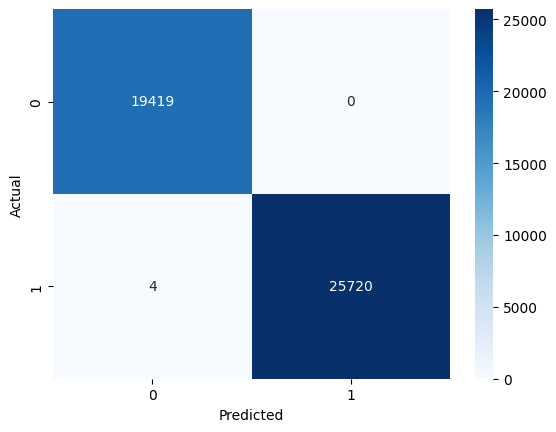

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [35]:
importances = rf.feature_importances_
feature_names = df.columns[:-1]
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df.sort_values(by='Importance', ascending=False).head(10)


,Feature,Importance
6,Fwd Packet Length Max,0.084447
66,Init_Win_bytes_forward,0.079819
53,Avg Fwd Segment Size,0.062090
8,Fwd Packet Length Mean,0.060235
63,Subflow Fwd Bytes,0.056324
62,Subflow Fwd Packets,0.053264
11,Bwd Packet Length Min,0.052384
4,Total Length of Fwd Packets,0.042268
0,Destination Port,0.041150
68,act_data_pkt_fwd,0.038133


In [ ]:
import joblib

# Save Random Forest
joblib.dump(rf, 'rf_model.pkl')

# Save Neural Network
model.save('nn_model.h5')
